In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima_model import ARIMA


In [17]:
apple_stock = yf.download('AAPL') 

[*********************100%%**********************]  1 of 1 completed


In [18]:
apple_stock.drop(columns=['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)

In [19]:
apple_stock.index = pd.to_datetime(apple_stock.index)

In [20]:
apple_stock = apple_stock[apple_stock.index > '2010-01-01']

In [21]:
apple_stock

,Adj Close,Volume
Date,,
2010-01-04,6.470741,493729600
2010-01-05,6.481930,601904800
2010-01-06,6.378825,552160000
2010-01-07,6.367032,477131200
2010-01-08,6.409363,447610800
...,...,...
2024-06-10,193.119995,97262100
2024-06-11,207.149994,172373300
2024-06-12,213.070007,198134300


In [24]:
apple_stock['return']= (apple_stock['Adj Close'] - apple_stock['Adj Close'].shift(1))/apple_stock['Adj Close'].shift(1)

C:\Users\12436\AppData\Local\Temp\ipykernel_14148\1354103055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock['return']= (apple_stock['Adj Close'] - apple_stock['Adj Close'].shift(1))/apple_stock['Adj Close'].shift(1)


In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly.express as px
import numpy as np 

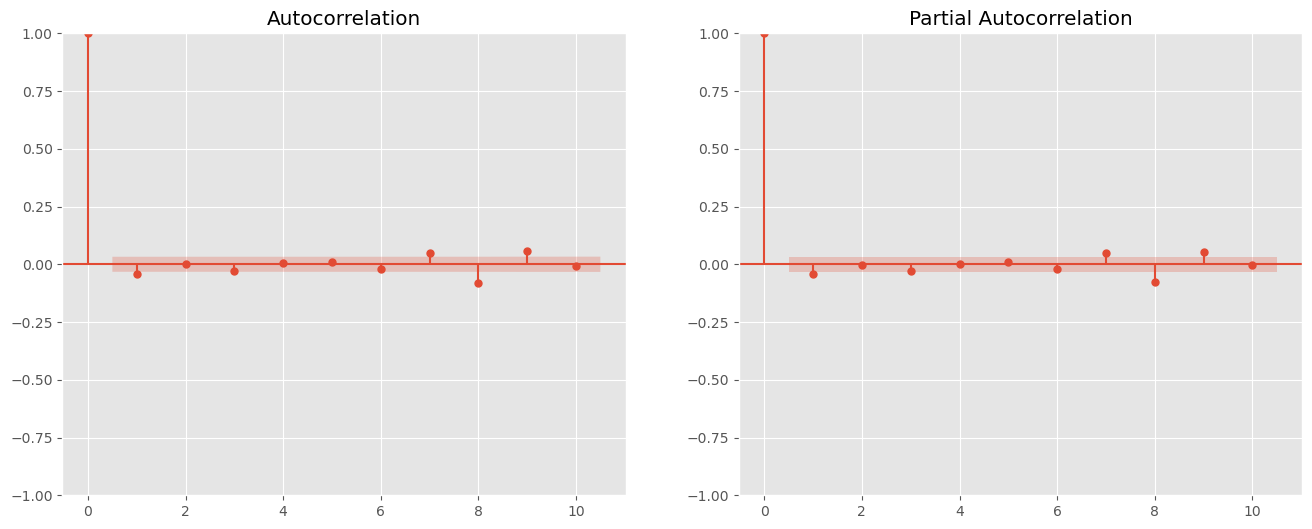

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(apple_stock['return'].dropna(), lags=10, ax=axes[0])
plot_pacf(apple_stock['return'].dropna(), lags=10, ax=axes[1])
plt.show()

In [30]:
train_set = apple_stock.iloc[:int(0.98*len(apple_stock['return'])),:]
test_set = apple_stock.iloc[int(0.98*len(apple_stock['return'])):, :]

train = train_set['return']
test = test_set['return']

(73,)

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(train, order=(1, 1, 1))
model1_fit = model1.fit()
print(model1_fit.summary())

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                 3564
Model:                 ARIMA(1, 1, 1)   Log Likelihood                9304.949
Date:                Mon, 17 Jun 2024   AIC                         -18603.898
Time:                        21:10:07   BIC                         -18585.363
Sample:                             0   HQIC                        -18597.289
                               - 3564                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0433      0.011     -3.855      0.000      -0.065      -0.021
ma.L1         -0.9999      0.038    -26.205      0.000      -1.075      -0.925
sigma2         0.0003   1.22e-05     25.659      0.0

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
model1_fit.forecast(len(test))

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3564    0.001299
3565    0.000982
3566    0.000995
3567    0.000995
3568    0.000995
          ...   
3632    0.000995
3633    0.000995
3634    0.000995
3635    0.000995
3636    0.000995
Name: predicted_mean, Length: 73, dtype: float64

In [77]:
df = pd.DataFrame(data=model1_fit.forecast(len(test)).values, index=test.index, columns=['predicted return difference'])

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [78]:
df['test return'] = test
df['predict return'] = df['test return'].shift(1)+df['predicted return difference']
# df['predict return'] = df['predict return'].shift(1)
df

,predicted return difference,test return,predict return
Date,,,
2024-03-04,0.001299,-0.025381,NaN
2024-03-05,0.000982,-0.028441,-0.024400
2024-03-06,0.000995,-0.005878,-0.027446
2024-03-07,0.000995,-0.000710,-0.004883
2024-03-08,0.000995,0.010237,0.000285
...,...,...,...
2024-06-10,0.000995,-0.019148,0.013387
2024-06-11,0.000995,0.072649,-0.018153
2024-06-12,0.000995,0.028578,0.073644


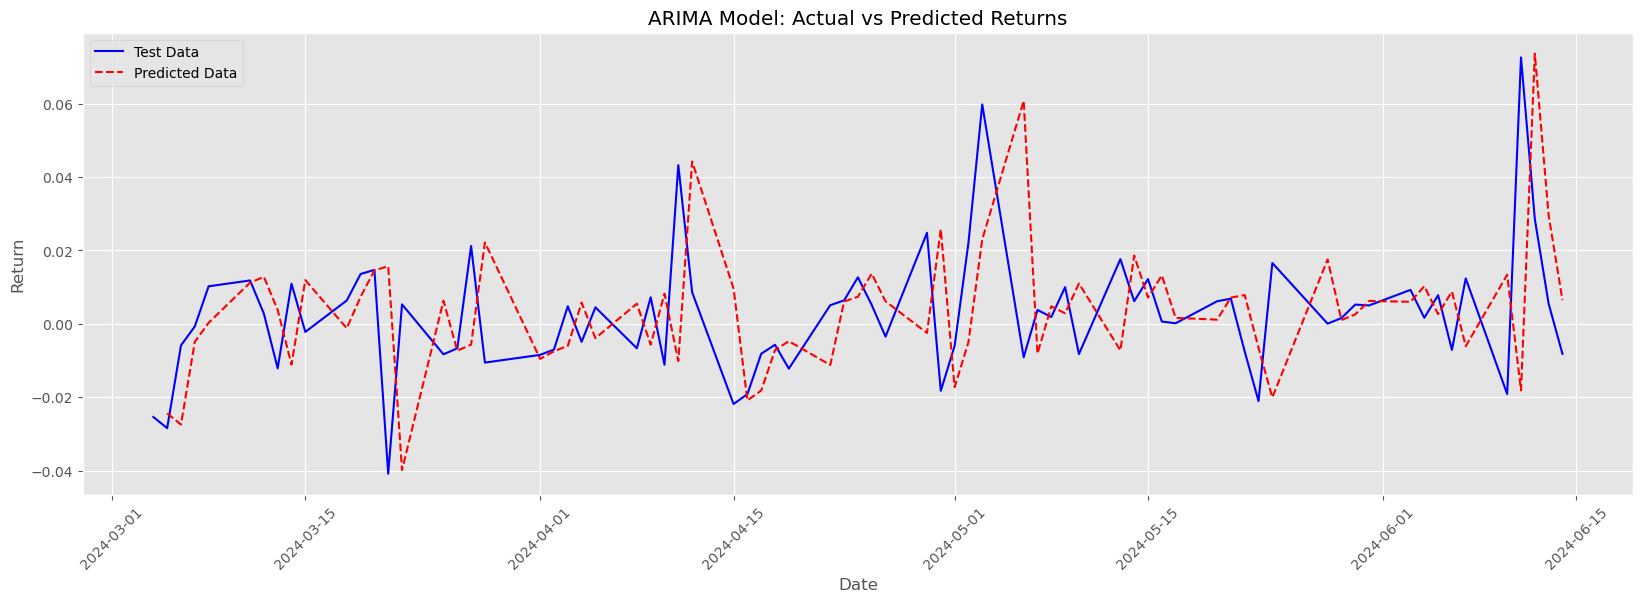

In [79]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['test return'], label='Test Data', color='blue')
plt.plot(df.index, df['predict return'], label='Predicted Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()


plt.xticks(rotation=45)
plt.show()

In [80]:
def plot_model_performance(y_pred, y_test):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    columns = ['Accuracy', 'Precision', 'Recall', 'F1 score']
    data = [accuracy, precision, recall, f1]
    df_metrics = pd.DataFrame(data=data, index=columns, columns=['metrics'])

    # Plot metrics
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot for metrics
    axes[0].bar(df_metrics.index, df_metrics['metrics'], color='grey')
    axes[0].set_xlabel('Metrics', fontsize=14)
    axes[0].set_ylabel('Scores', fontsize=14)
    axes[0].set_title('Model Performance Metrics', fontsize=20, fontweight='bold')
    axes[0].set_ylim(0, 1)
    for bar in axes[0].patches:
        height = bar.get_height()
        axes[0].annotate(f'{height:.2f}', 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Confusion matrix
    dt_cf = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(dt_cf).plot(ax=axes[1], cmap='coolwarm')
    axes[1].set_title('Confusion Matrix', fontsize=20, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [85]:
df.dropna(inplace=True)


In [88]:
df

,predicted return difference,test return,predict return
Date,,,
2024-03-05,0.000982,-0.028441,-0.024400
2024-03-06,0.000995,-0.005878,-0.027446
2024-03-07,0.000995,-0.000710,-0.004883
2024-03-08,0.000995,0.010237,0.000285
2024-03-11,0.000995,0.011832,0.011232
...,...,...,...
2024-06-10,0.000995,-0.019148,0.013387
2024-06-11,0.000995,0.072649,-0.018153
2024-06-12,0.000995,0.028578,0.073644


In [90]:
df['predict return binary'] = np.where(df['predict return']>0, 1, 0)
df['predict return binary'].value_counts()

predict return binary
1    44
0    28
Name: count, dtype: int64

In [91]:
df['test return binary'] = np.where(df['test return']>0, 1, 0)
df['test return binary'].value_counts()

test return binary
1    43
0    29
Name: count, dtype: int64

In [92]:
df

,predicted return difference,test return,predict return,predict return binary,test return binary
Date,,,,,
2024-03-05,0.000982,-0.028441,-0.024400,0,0
2024-03-06,0.000995,-0.005878,-0.027446,0,0
2024-03-07,0.000995,-0.000710,-0.004883,0,0
2024-03-08,0.000995,0.010237,0.000285,1,1
2024-03-11,0.000995,0.011832,0.011232,1,1
...,...,...,...,...,...
2024-06-10,0.000995,-0.019148,0.013387,1,0
2024-06-11,0.000995,0.072649,-0.018153,0,1
2024-06-12,0.000995,0.028578,0.073644,1,1


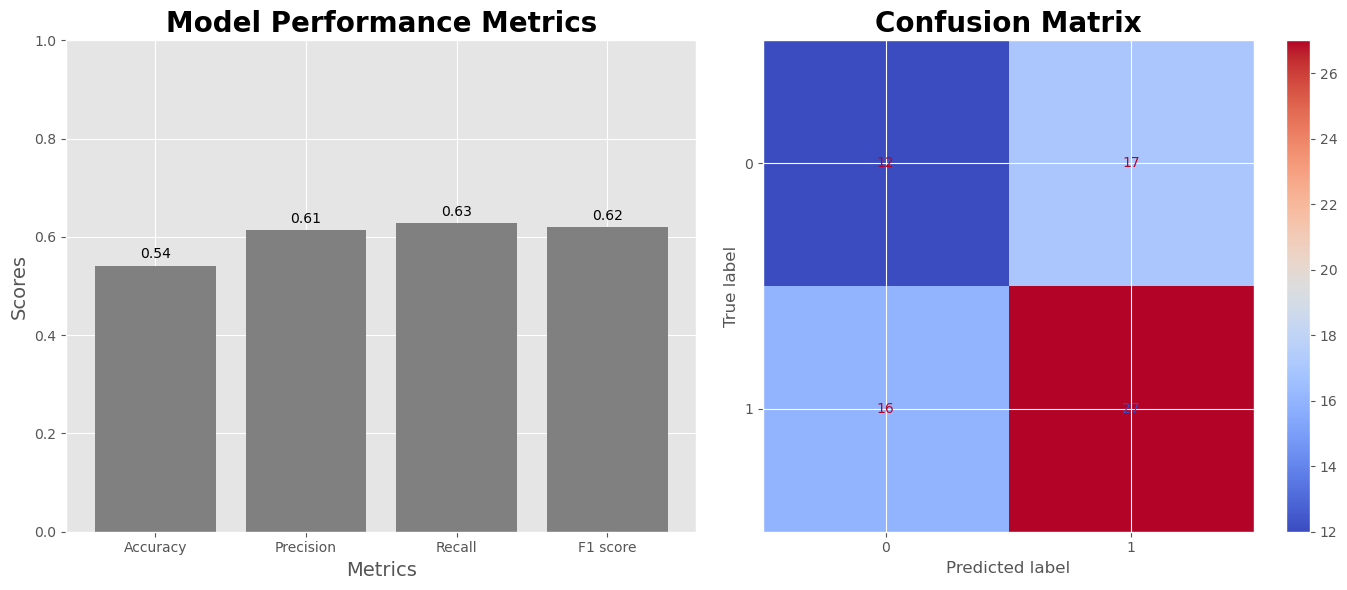

In [93]:
plot_model_performance(df['predict return binary'], df['test return binary'])

In [94]:
history = [x for x in train] # Make the history as a list 
predictions = list()      # Make the prediction also as a list 

for t in range(len(test)):      # for every new point, we make a decision based on the available history 
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'finish {t} round, {len(test_set)-t} left')

finish 0 round, 73 left
finish 1 round, 72 left
finish 2 round, 71 left
finish 3 round, 70 left
finish 4 round, 69 left
finish 5 round, 68 left
finish 6 round, 67 left
finish 7 round, 66 left
finish 8 round, 65 left
finish 9 round, 64 left
finish 10 round, 63 left
finish 11 round, 62 left
finish 12 round, 61 left
finish 13 round, 60 left
finish 14 round, 59 left
finish 15 round, 58 left
finish 16 round, 57 left
finish 17 round, 56 left
finish 18 round, 55 left
finish 19 round, 54 left
finish 20 round, 53 left
finish 21 round, 52 left
finish 22 round, 51 left
finish 23 round, 50 left
finish 24 round, 49 left
finish 25 round, 48 left
finish 26 round, 47 left
finish 27 round, 46 left
finish 28 round, 45 left
finish 29 round, 44 left
finish 30 round, 43 left
finish 31 round, 42 left
finish 32 round, 41 left
finish 33 round, 40 left
finish 34 round, 39 left
finish 35 round, 38 left
finish 36 round, 37 left
finish 37 round, 36 left
finish 38 round, 35 left
finish 39 round, 34 left
finish 40 

In [96]:
predictions

[-0.004812401497205218,
 -0.015297732684665433,
 -0.02684691321769804,
 -0.017633577620391583,
 -0.0034016024936700073,
 0.004535732852540147,
 0.011000974730309438,
 0.007493235350407083,
 -0.004363409818915009,
 -0.0010772097873998163,
 0.004638601808680528,
 0.0019094543385041098,
 0.009828833940958206,
 0.014123794751328697,
 -0.011918549912135486,
 -0.018752684169105128,
 -0.0012092964040638062,
 -0.007520590660618368,
 0.006685907442120595,
 0.005998822686237228,
 -0.009551532097868892,
 -0.007757810559697164,
 -0.0013477731362528372,
 0.00015568652515608825,
 -0.0003923891484718051,
 -0.000846309546533185,
 -3.1966885649008583e-06,
 -0.0015602838445671133,
 0.014897913849871696,
 0.026697466974835788,
 -0.0059813853905607076,
 -0.020571259205896055,
 -0.013885529180750492,
 -0.006981146963456902,
 -0.008829115728074724,
 -0.003919267830788373,
 0.005714442825914477,
 0.009416776101383839,
 0.00908075563658091,
 0.0010148495818735849,
 0.010082422578801388,
 0.004174654721748175,

In [97]:
df1 = pd.DataFrame(data=predictions, index=test.index, columns=['predicted return difference compared with today'])

In [101]:
df1['test return'] = test
df1['predicted return'] = df1['predicted return difference compared with today'] + df1['test return'].shift(1)
df1

,predicted return difference compared with today,test return,predicted return
Date,,,
2024-03-04,-0.004812,-0.025381,NaN
2024-03-05,-0.015298,-0.028441,-0.040679
2024-03-06,-0.026847,-0.005878,-0.055288
2024-03-07,-0.017634,-0.000710,-0.023512
2024-03-08,-0.003402,0.010237,-0.004111
...,...,...,...
2024-06-10,0.002251,-0.019148,0.014643
2024-06-11,-0.002731,0.072649,-0.021878
2024-06-12,0.024775,0.028578,0.097424


In [102]:
df1.dropna(inplace=True)

In [103]:
df1['predict return binary'] = np.where(df1['predicted return']>0, 1, 0)
df1['predict return binary'].value_counts()

predict return binary
1    44
0    28
Name: count, dtype: int64

In [104]:
df1['test return binary'] = np.where(df1['test return']>0, 1, 0)
df1['test return binary'].value_counts()

test return binary
1    43
0    29
Name: count, dtype: int64

In [105]:
df1

,predicted return difference compared with today,test return,predicted return,predict return binary,test return binary
Date,,,,,
2024-03-05,-0.015298,-0.028441,-0.040679,0,0
2024-03-06,-0.026847,-0.005878,-0.055288,0,0
2024-03-07,-0.017634,-0.000710,-0.023512,0,0
2024-03-08,-0.003402,0.010237,-0.004111,0,1
2024-03-11,0.004536,0.011832,0.014772,1,1
...,...,...,...,...,...
2024-06-10,0.002251,-0.019148,0.014643,1,0
2024-06-11,-0.002731,0.072649,-0.021878,0,1
2024-06-12,0.024775,0.028578,0.097424,1,1


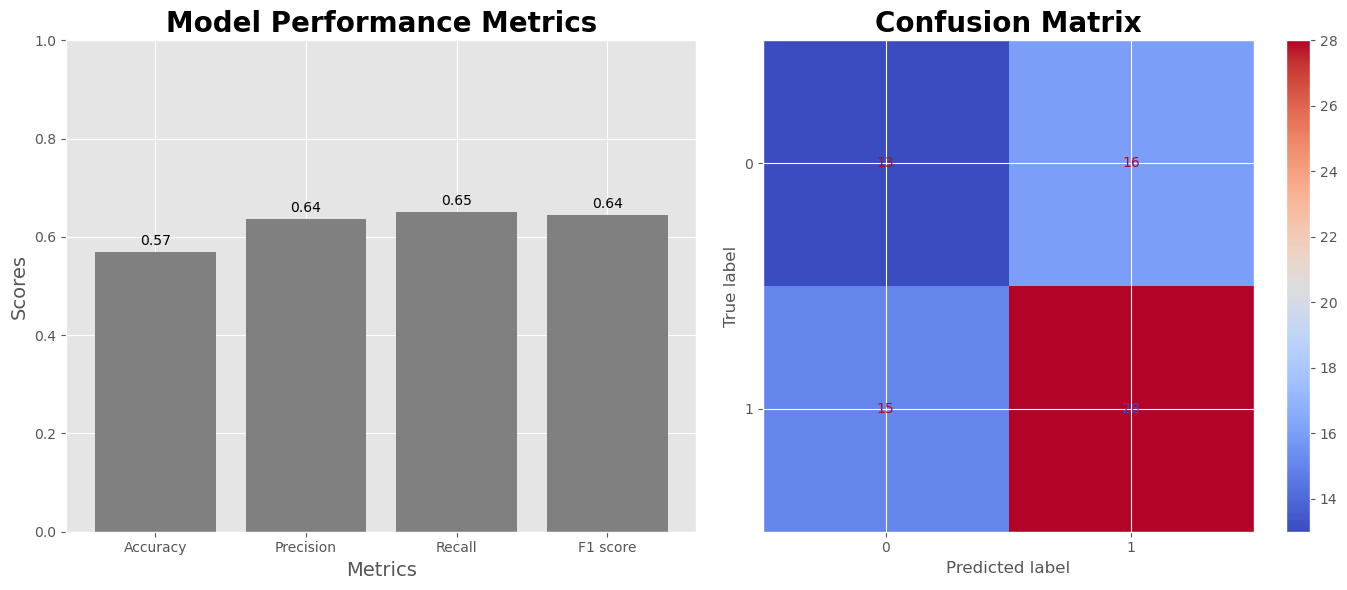

In [106]:
plot_model_performance(df1['predict return binary'], df1['test return binary'])